In [1]:
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

# load the mnist dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# look at data
print(train_images.shape)
print(train_labels)
print(test_images.shape)
print(test_labels)

# build network architecture
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

# compilation step: loss function, optimizer, metrics
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Before training, we’ll preprocess the data by reshaping it into the shape the network
# expects and scaling it so that all values are in the [0, 1] interval
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255
test_images  = test_images.reshape((10000, 28 * 28))
test_images  = test_images.astype('float32') / 255

# prepare the label
train_labels = to_categorical(train_labels)
test_labels  = to_categorical(test_labels)

# train
network.fit(train_images, train_labels, epochs=5, batch_size=128)

# test
test_loss, test_acc = network.evaluate(test_images, test_labels)
print("test result: ", test_loss, test_acc)

Using TensorFlow backend.


(60000, 28, 28)
[5 0 4 ... 5 6 8]
(10000, 28, 28)
[7 2 1 ... 4 5 6]
Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2589 - acc: 0.9254
Epoch 2/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.1029 - acc: 0.9693
Epoch 3/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0680 - acc: 0.9797
Epoch 4/5
60000/60000 [==============================] - 1s 12us/step - loss: 0.0490 - acc: 0.9853
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
test result:  0.06965903874915093 0.9786


In [3]:
print(network.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
None


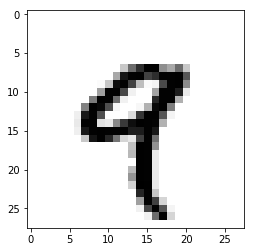

In [9]:
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [2]:
import numpy as np

# scalars (0D tensors)
x = np.array(12)
print("0D: ", x, x.ndim, np.shape(x))

# vectors (1D tensors)
y = np.array([12, 3, 6, 14])
print("1D: ", y, y.ndim, np.shape(y))

# matrices (2D tensors)
z = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])
print("2D: ", z, z.ndim, np.shape(z))

# 3D tensors and higher-dimensional tensors
k = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])
print("3D: ", k, k.ndim, np.shape(k))

0D:  12 0 ()
1D:  [12  3  6 14] 1 (4,)
2D:  [[ 5 78  2 34  0]
 [ 6 79  3 35  1]
 [ 7 80  4 36  2]] 2 (3, 5)
3D:  [[[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]

 [[ 5 78  2 34  0]
  [ 6 79  3 35  1]
  [ 7 80  4 36  2]]] 3 (3, 3, 5)


In [12]:
#  Selecting specific elements in a tensor is called tensor slicing
my_slice1 = train_images[10:100]
my_slice2 = train_images[10:100, :, :]
my_slice3 = train_images[10:100, 0:28, 0:28]
print(my_slice1.shape, my_slice2.shape, my_slice3.shape)

my_slice4 = train_images[:, 14:, 14:]
my_slice5 = train_images[:,7:-7, 7:-4]
print(my_slice4.shape, my_slice5.shape)

# In general, the first axis (axis 0) in all data tensors you’ll come across in deep learning will be the samples axis, 
# sometimes called the samples dimension. In addition, deep-learning models don’t process an entire dataset at once; rather,
# they break the data into small batches
batch = train_images[:128]

(90, 28, 28) (90, 28, 28) (90, 28, 28)
(60000, 14, 14) (60000, 14, 17)


In [5]:
# 1. Elementwise Operations
def naive_relu(x):
    assert len(x.shape) == 2
    x = x.copy() # Avoid overwriting the input tensor.
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] = max(x[i, j], 0)
    return x

def naive_add(x, y):
    assert len(x.shape) == 2
    assert x.shape == y.shape
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[i, j]
    return x

x = np.random.random((32, 1))
y = np.random.random((32, 1))
z = x + y
z = np.maximum(z, 0.)

"""
2. Broadcasting
   -- Broadcasting consists of two steps:
      (1) Axes (called broadcast axes) are added to the smaller tensor to match the ndim of the larger tensor.
      (2) The smaller tensor is repeated alongside these new axes to match the full shape of the larger tensor.
   -- Example: Consider X with shape (32, 10) and y with shape (10,). First, we add an empty first axis to y, whose shape becomes (1, 10).
      Then, we repeat y 32 times alongside this new axis, so that we end up with a tensor Y with shape (32, 10), where Y[i, :] == y
      for i in range(0, 32). At this point, we can proceed to add X and Y, because they have the same shape.
   -- With broadcasting, you can generally apply two-tensor element-wise operations if one tensor has shape (a, b, … n, n + 1, … m)
      and the other has shape (n, n + 1, … m). The broadcasting will then automatically happen for axes a through n - 1.
"""
def naive_add_matrix_and_vector(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    x = x.copy()
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            x[i, j] += y[j]
    return x

x = np.random.random((64, 3, 32, 10))
y = np.random.random((32, 10))
z = np.maximum(x, y)
print(z.shape)


"""
3. Tensor Dot
   You can take the dot product between higher-dimensional tensors, following the same rules for shape compatibility
   as outlined earlier for the 2D case.
   (a, b, c, d) . (d,) -> (a, b, c)           (a, b, c, d) . (d, e) -> (a, b, c, e)
"""
def naive_vector_dot(x, y):
    assert len(x.shape) == 1
    assert len(y.shape) == 1
    assert x.shape[0] == y.shape[0]
    z = 0.
    for i in range(x.shape[0]):
        z += x[i] * y[i]
    return z

def naive_matrix_vector_dot1(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 1
    assert x.shape[1] == y.shape[0]
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        for j in range(x.shape[1]):
            z[i] += x[i, j] * y[j]
    return z

def naive_matrix_vector_dot2(x, y):
    z = np.zeros(x.shape[0])
    for i in range(x.shape[0]):
        z[i] = naive_vector_dot(x[i, :], y)

def naive_matrix_vector_dot(x, y):
    assert len(x.shape) == 2
    assert len(y.shape) == 2
    assert x.shape[1] == y.shape[0]

    z = np.zeros((x.shape[0], y.shape[1]))
    for i in range(x.shape[0]):
        for j in range(y.shape[1]):
            row_x = x[i, :]
            column_y = y[:, j]
            z[i, j] = naive_vector_dot(row_x, column_y)
    return z

# 4. Tensor Reshape
x = np.array([[0., 1.], [2., 3.], [4., 5.]])
print(x, x.shape)
x = x.reshape((6, 1))
print(x, x.shape)

y = np.zeros((300, 20))
y = np.transpose(y)
print(y.shape)

"""
5. Geometric interpretation of tensor operations
   -- Because the contents of the tensors manipulated by tensor operations can be interpreted as coordinates of points in some geometric
      space, all tensor operations have a geometric interpretation.
   -- In general, elementary geometric operations such as affine transformations, rotations, scaling, and so on can be expressed as tensor
      operations.
   -- You just learned that neural networks consist entirely of chains of tensor operations and that all of these tensor operations are
      just geometric transformations of the input data. It follows that you can interpret a neural network as a very complex geometric
      transformation in a high-dimensional space, implemented via a long series of simple steps.
"""


(64, 3, 32, 10)
[[0. 1.]
 [2. 3.]
 [4. 5.]] (3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]] (6, 1)
(20, 300)
